# Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Creating the model 

In [8]:
model = RandomForestClassifier()

# Working with our model for our different datasets

#### Balanced data with SMOTETomek + dataset filled with 0s

In [11]:
#importing the datasets
X_0_oh = pd.read_csv('data/2.Balancing/X_pca_0.csv', index_col = None)
y_0_oh = pd.read_csv('data/2.Balancing/y_pca_0.csv', index_col = None)

In [12]:
X_0_oh.head()

,pca_1,pca_2,pca_3,pca_4
0,-240.551384,-56.975198,-15.816848,-26.561074
1,-176.557574,-57.666367,-15.387076,-25.494301
2,-241.561333,-58.200256,-16.507328,-26.461736
3,-240.551766,-56.916677,-15.749602,-25.579591
4,386.887306,-63.793789,-11.651854,-16.873476


# y_0_oh.head() #target variable

Visualizing some columns and their difference between clase 0 or 1 in target variable

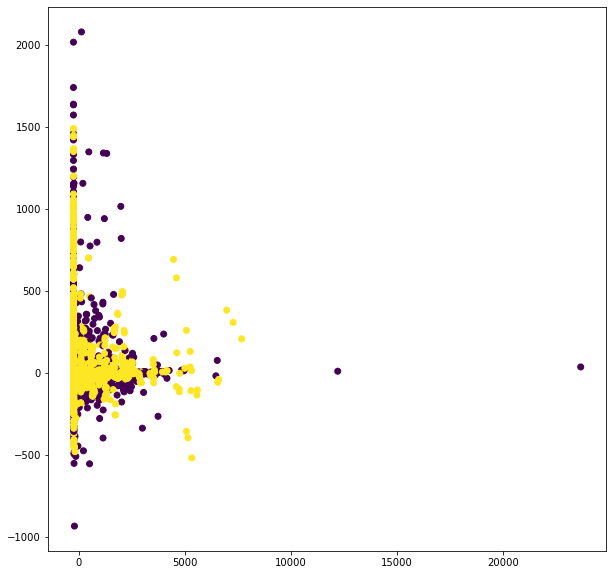

In [13]:
plt.scatter((X_0_oh.to_numpy()[:,0]),(X_0_oh.to_numpy()[:,2]), c= y_0_oh.to_numpy())

Now that we have our datasets imported, we should divide our data into train and test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_0_oh, y_0_oh, test_size=0.2)

We will work with our model to see how it performs with this train and test groups and the default params.

In [15]:
model.fit(X_train, np.ravel(y_train)).score(X_train, np.ravel(y_train)) #adding np.ravel to avoid 1d error

0.9999156260546743

In [16]:
model.fit(X_train, np.ravel(y_train)).score(X_test, np.ravel(y_test))

0.8164642375168691

Our model might tend to overfitting, since it almost performs a 100% with the train data. We are going to check the parameters used to see if we can adjust it for a better performance

In [17]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Checking Random Forest max_depth plausible

In [18]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 35)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = RandomForestClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, np.ravel(y_train))

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(np.ravel(y_train), train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(np.ravel(y_test), test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.638, test: 0.648
>2, train: 0.652, test: 0.657
>3, train: 0.661, test: 0.665
>4, train: 0.667, test: 0.672
>5, train: 0.686, test: 0.680
>6, train: 0.701, test: 0.689
>7, train: 0.726, test: 0.701
>8, train: 0.750, test: 0.708
>9, train: 0.776, test: 0.721
>10, train: 0.804, test: 0.729
>11, train: 0.833, test: 0.742
>12, train: 0.869, test: 0.749
>13, train: 0.891, test: 0.758
>14, train: 0.923, test: 0.777
>15, train: 0.944, test: 0.775
>16, train: 0.956, test: 0.789
>17, train: 0.972, test: 0.798
>18, train: 0.979, test: 0.803
>19, train: 0.987, test: 0.808
>20, train: 0.990, test: 0.812
>21, train: 0.995, test: 0.812
>22, train: 0.996, test: 0.815
>23, train: 0.998, test: 0.813
>24, train: 0.998, test: 0.814
>25, train: 0.999, test: 0.818
>26, train: 0.999, test: 0.810
>27, train: 0.999, test: 0.811
>28, train: 1.000, test: 0.815
>29, train: 1.000, test: 0.814
>30, train: 1.000, test: 0.817
>31, train: 1.000, test: 0.815
>32, train: 1.000, test: 0.815
>33, train: 1.000

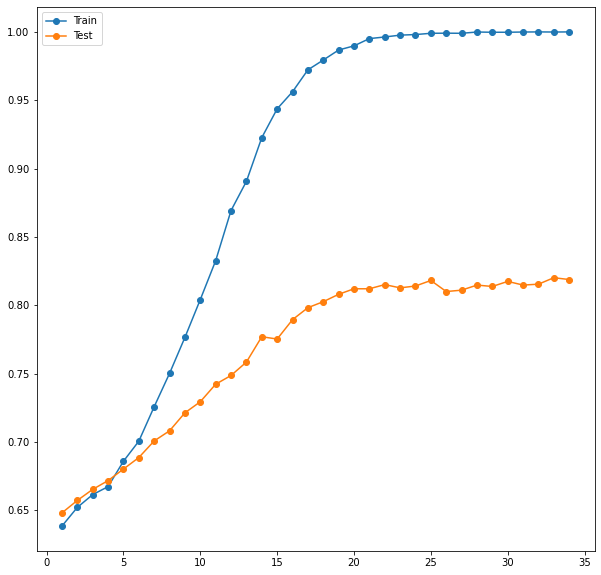

In [19]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

We can see that around 25 of max_depth it gets stabilized.However, the train curve gets closer to the 1 and therefore closer to overfitting. We will pick as max_depth the value of 17. Let's adapt the parameters and try to get our model to perform as best as possible. 

In [20]:
model.feature_importances_

array([0.23959897, 0.27344027, 0.22936917, 0.25759159])

## Grid Search

In [28]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,12,15,17],
    #'max_features': [0,4], #For classification a good default is: m = sqrtp
    'n_estimators': [100,300,500], 
    'criterion': ['gini', 'entropy']
}

In [29]:
model_sel = GridSearchCV(model,param_grid)

In [32]:
model_sel.fit(X_train, np.ravel(y_train))

GridSearchCV(estimator=RandomForestClassifier(max_depth=34),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 17],
                         'n_estimators': [100, 300, 500]})

In [33]:
model_sel.best_estimator_.score(X_test, y_test)

0.793859649122807

In [34]:
model_sel.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 17, 'n_estimators': 500}

### Classification report

In [35]:
y_pred = model_sel.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1921
           1       0.74      0.65      0.69      1043

    accuracy                           0.79      2964
   macro avg       0.78      0.76      0.77      2964
weighted avg       0.79      0.79      0.79      2964



With our dataset 'data/2.Balancing/X_0_out_maxmin.csv', which was filled with 0s and balanced using the SMOTETomek method these are the results we get: 

- The recall means "how many of this class you find over the whole number of element of this class"

- The precision will be "how many are correctly classified among that class"

- The f1-score is the harmonic mean between precision & recall

- The support is the number of occurence of the given class in your dataset (so you have 37.5K of class 0 and 37.5K of class 1, which is a really well balanced dataset.

Precision and recall is highly used for imbalanced dataset because in an highly imbalanced dataset, a 99% accuracy can be meaningless.



In this case, 95% of the non customers are correctly classified and 74% of the customers are correctly classified. 

Also, we find 89% of the class 1 cluster.

Also, we have the dataset balanced on a 75% + 25% ratio.

#### Balanced data with SMOTETomek + dataset filled with mean + knn 

In [37]:
#importing the datasets
X_knn = pd.read_csv('data/2.Balancing/X_pca_mean.csv', index_col = None)
y_knn = pd.read_csv('data/2.Balancing/y_pca_mean.csv', index_col = None)

In [38]:
X_knn.head()

,pca_1,pca_2,pca_3,pca_4
0,-481.989295,-51.104166,-6.907223,-19.427095
1,-418.017323,-53.230286,-6.939236,-19.247165
2,-483.031958,-52.355612,-7.491533,-19.310897
3,-2.650685,-67.496747,-7.530084,-24.518337
4,145.224616,-71.999472,-7.262105,-18.435645


In [39]:
y_knn.head() #target variable

,Revenue
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Visualizing some columns and their difference between clase 0 or 1 in target variable

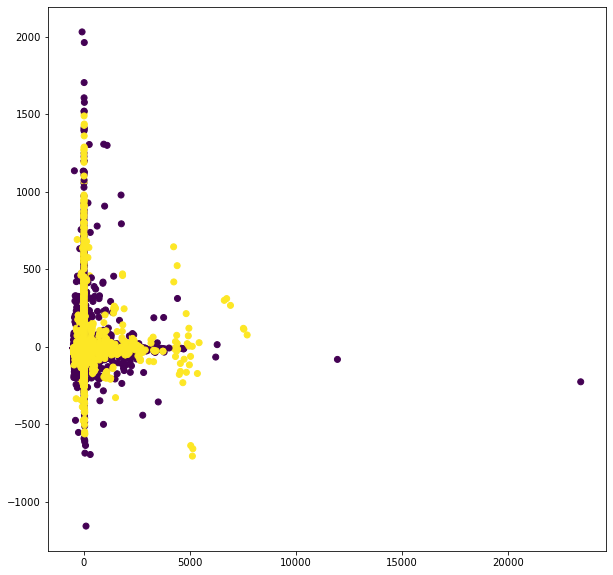

In [40]:
plt.scatter((X_knn.to_numpy()[:,0]),(X_knn.to_numpy()[:,2]), c= y_knn.to_numpy())

Now that we have our datasets imported, we should divide our data into train and test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.2)

We will work with our model to see how it performs with this train and test groups and the default params.

In [42]:
model.fit(X_train, np.ravel(y_train)).score(X_train, np.ravel(y_train)) #adding np.ravel to avoid 1d error

1.0

In [43]:
model.fit(X_train, np.ravel(y_train)).score(X_test, np.ravel(y_test))

0.8128772635814889

Our model might tend to overfitting, since it almost performs a 100% with the train data. We are going to check the parameters used to see if we can adjust it for a better performance

In [44]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 34,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Checking Random Forest max_depth plausible

In [45]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 45)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = RandomForestClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, np.ravel(y_train))

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(np.ravel(y_train), train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(np.ravel(y_test), test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.641, test: 0.635
>2, train: 0.663, test: 0.648
>3, train: 0.665, test: 0.649
>4, train: 0.680, test: 0.664
>5, train: 0.700, test: 0.671
>6, train: 0.715, test: 0.683
>7, train: 0.743, test: 0.704
>8, train: 0.772, test: 0.714
>9, train: 0.804, test: 0.734
>10, train: 0.840, test: 0.747
>11, train: 0.876, test: 0.760
>12, train: 0.907, test: 0.772
>13, train: 0.924, test: 0.780
>14, train: 0.949, test: 0.792
>15, train: 0.961, test: 0.797
>16, train: 0.975, test: 0.802
>17, train: 0.983, test: 0.814
>18, train: 0.988, test: 0.807
>19, train: 0.992, test: 0.807
>20, train: 0.993, test: 0.816
>21, train: 0.996, test: 0.813
>22, train: 0.996, test: 0.816
>23, train: 0.997, test: 0.811
>24, train: 0.998, test: 0.812
>25, train: 0.999, test: 0.813
>26, train: 0.999, test: 0.816
>27, train: 0.999, test: 0.814
>28, train: 0.999, test: 0.816
>29, train: 1.000, test: 0.820
>30, train: 1.000, test: 0.817
>31, train: 1.000, test: 0.814
>32, train: 1.000, test: 0.815
>33, train: 1.000

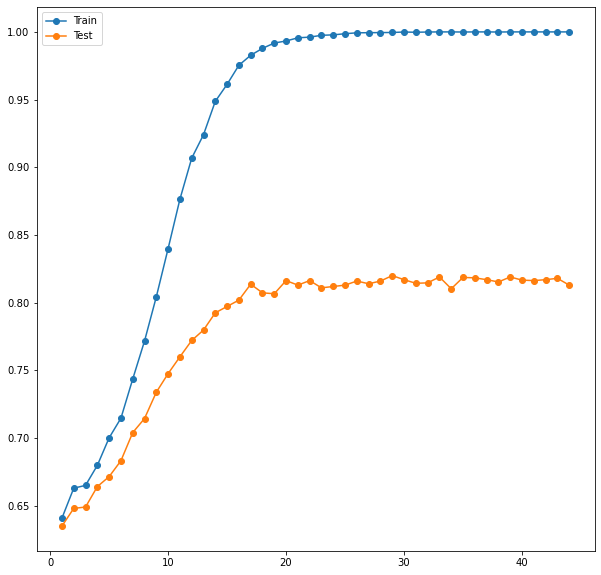

In [46]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [47]:
model.feature_importances_

array([0.29150274, 0.24751904, 0.23203127, 0.22894695])

## Grid Search

In [57]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15,20],
    #'max_features': [0, 3], #For classification a good default is: m = sqrtp
    'n_estimators': [100,300,500,800], 
    'criterion': ['gini', 'entropy']
}

In [58]:
model_sel = GridSearchCV(model,param_grid)

In [59]:
model_sel.fit(X_train, np.ravel(y_train))

GridSearchCV(estimator=RandomForestClassifier(max_depth=44),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'n_estimators': [100, 300, 500, 800]})

In [60]:
model_sel.best_estimator_.score(X_test, y_test)

0.8112005365526492

In [61]:
model_sel.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'n_estimators': 800}

### Classification report

In [62]:
y_pred = model_sel.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85      1893
         1.0       0.75      0.73      0.74      1089

    accuracy                           0.81      2982
   macro avg       0.80      0.79      0.80      2982
weighted avg       0.81      0.81      0.81      2982



With our dataset:

In this case, 95% of the non customers are correctly classified and 76% of the customers are correctly classified. 

Also, we find 90% of the class 1 cluster.

Also, we have the dataset balanced on a 75% + 25% ratio.

#### Dataset with filled NaNs as 0

In [64]:
#importing the datasets
df = pd.read_csv('data/0.NaNs/df_0_oh.csv', index_col = None)

In [65]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.0,0.20,0.20,0.0,0.0,2,1.0,1,1,1,0,0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,2.0,64.0,0.00,0.10,0.0,0.0,2,2.0,2,1,2,0,0,0.0,0.0,1.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.20,0.20,0.0,0.0,2,4.0,1,9,3,0,0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.05,0.14,0.0,0.0,2,3.0,2,2,4,0,0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,10.0,627.5,0.02,0.05,0.0,0.0,2,3.0,3,1,4,1,0,0.0,0.0,1.0


In [66]:
X_oh_0 = df.drop('Revenue', axis=1)
y_oh_0 = df['Revenue']

Visualizing some columns and their difference between clase 0 or 1 in target variable

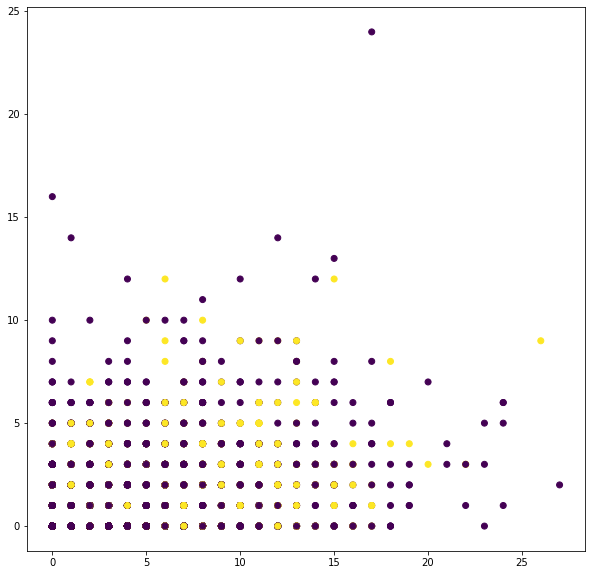

In [67]:
plt.scatter((X_oh_0.to_numpy()[:,0]),(X_oh_0.to_numpy()[:,2]), c= y_oh_0.to_numpy())

Now that we have our datasets imported, we should divide our data into train and test

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_oh_0, y_oh_0, test_size=0.2)

We will work with our model to see how it performs with this train and test groups and the default params.

In [66]:
model.fit(X_train, np.ravel(y_train)).score(X_train, np.ravel(y_train)) #adding np.ravel to avoid 1d error

1.0

In [67]:
model.fit(X_train, np.ravel(y_train)).score(X_test, np.ravel(y_test))

0.8626574563185697

Our model might tend to overfitting, since it almost performs a 100% with the train data. We are going to check the parameters used to see if we can adjust it for a better performance

In [68]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 44,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Checking Random Forest max_depth plausible

In [69]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1,50)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = RandomForestClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, np.ravel(y_train))

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(np.ravel(y_train), train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(np.ravel(y_test), test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.844, test: 0.850
>2, train: 0.844, test: 0.850
>3, train: 0.847, test: 0.854
>4, train: 0.849, test: 0.855
>5, train: 0.852, test: 0.861
>6, train: 0.852, test: 0.861
>7, train: 0.853, test: 0.861
>8, train: 0.856, test: 0.861
>9, train: 0.860, test: 0.861
>10, train: 0.868, test: 0.862
>11, train: 0.882, test: 0.863
>12, train: 0.890, test: 0.865
>13, train: 0.907, test: 0.867
>14, train: 0.925, test: 0.865
>15, train: 0.942, test: 0.865
>16, train: 0.957, test: 0.862
>17, train: 0.970, test: 0.862
>18, train: 0.980, test: 0.864
>19, train: 0.987, test: 0.861
>20, train: 0.992, test: 0.863
>21, train: 0.997, test: 0.861
>22, train: 0.998, test: 0.863
>23, train: 0.999, test: 0.862
>24, train: 1.000, test: 0.864
>25, train: 1.000, test: 0.864
>26, train: 1.000, test: 0.861
>27, train: 1.000, test: 0.862
>28, train: 1.000, test: 0.862
>29, train: 1.000, test: 0.864
>30, train: 1.000, test: 0.863
>31, train: 1.000, test: 0.863
>32, train: 1.000, test: 0.858
>33, train: 1.000

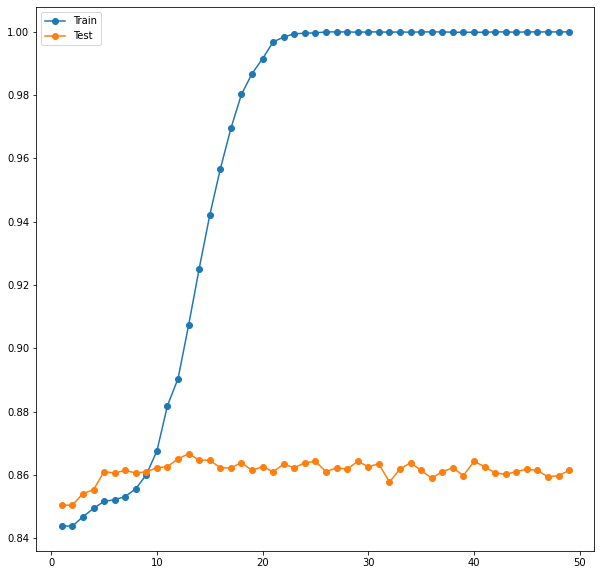

In [70]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [71]:
model.feature_importances_

array([0.07377737, 0.07893806, 0.0276999 , 0.03840313, 0.1303252 ,
       0.06629041, 0.07856753, 0.16318353, 0.03660198, 0.00690216,
       0.06815826, 0.03282994, 0.03895753, 0.05991689, 0.05850304,
       0.01998356, 0.01021851, 0.00077114, 0.00997188])

## Grid Search

In [72]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,12,15,20],
    'max_features': [5], #For classification a good default is: m = sqrtp
    'n_estimators': [100,300,500], 
    'criterion': ['gini', 'entropy']
}

In [73]:
model_sel = GridSearchCV(model,param_grid)

In [74]:
model_sel.fit(X_train, np.ravel(y_train))

GridSearchCV(estimator=RandomForestClassifier(max_depth=49),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 20], 'max_features': [5],
                         'n_estimators': [100, 300, 500]})

In [75]:
model_sel.best_estimator_.score(X_test, y_test)

0.8614384396586753

In [76]:
model_sel.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 5,
 'n_estimators': 300}

### Classification report

In [77]:
y_pred = model_sel.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      2093
           1       0.71      0.12      0.21       368

    accuracy                           0.86      2461
   macro avg       0.79      0.56      0.57      2461
weighted avg       0.84      0.86      0.82      2461



In this case, 99% of the non customers are correctly classified and 12% of the customers are correctly classified. 

Also, we find 71% of the class 1 cluster.

Also, we have the dataset is really unbalanced.

#### Dataset with filled NaNs as mean + knn

In [79]:
#importing the datasets
df = pd.read_csv('data/0.NaNs/df_mean_knn.csv', index_col = None)

In [80]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor,PageValues
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,2.0,4.0,1.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,2.0,479.647091,0.05,0.14,0.0,2.0,3.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,2.0,3.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0


In [81]:
X_knn_mean = df.drop('Revenue', axis=1)
y_knn_mean = df['Revenue']

Visualizing some columns and their difference between clase 0 or 1 in target variable

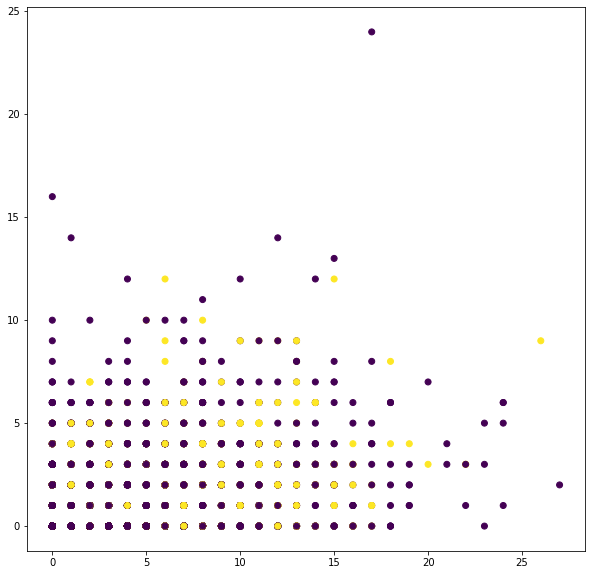

In [82]:
plt.scatter((X_knn_mean.to_numpy()[:,0]),(X_knn_mean.to_numpy()[:,2]), c= y_knn_mean.to_numpy())

Now that we have our datasets imported, we should divide our data into train and test

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_knn_mean, y_knn_mean, test_size=0.2)

We will work with our model to see how it performs with this train and test groups and the default params.

In [85]:
model.fit(X_train, np.ravel(y_train)).score(X_train, np.ravel(y_train)) #adding np.ravel to avoid 1d error

0.9998984049578381

In [86]:
model.fit(X_train, np.ravel(y_train)).score(X_test, np.ravel(y_test))

0.8419341731003657

Our model might tend to overfitting, since it almost performs a 100% with the train data. We are going to check the parameters used to see if we can adjust it for a better performance

In [87]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 49,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Checking Random Forest max_depth plausible

In [88]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1,50)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = RandomForestClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, np.ravel(y_train))

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(np.ravel(y_train), train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(np.ravel(y_test), test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.850, test: 0.825
>2, train: 0.850, test: 0.825
>3, train: 0.853, test: 0.829
>4, train: 0.858, test: 0.834
>5, train: 0.861, test: 0.838
>6, train: 0.862, test: 0.837
>7, train: 0.863, test: 0.837
>8, train: 0.867, test: 0.840
>9, train: 0.871, test: 0.840
>10, train: 0.878, test: 0.840
>11, train: 0.885, test: 0.841
>12, train: 0.896, test: 0.842
>13, train: 0.908, test: 0.844
>14, train: 0.921, test: 0.843
>15, train: 0.935, test: 0.844
>16, train: 0.951, test: 0.844
>17, train: 0.964, test: 0.841
>18, train: 0.975, test: 0.845
>19, train: 0.983, test: 0.842
>20, train: 0.988, test: 0.844
>21, train: 0.995, test: 0.842
>22, train: 0.997, test: 0.844
>23, train: 0.998, test: 0.842
>24, train: 0.999, test: 0.844
>25, train: 0.999, test: 0.842
>26, train: 1.000, test: 0.846
>27, train: 1.000, test: 0.844
>28, train: 1.000, test: 0.843
>29, train: 1.000, test: 0.842
>30, train: 1.000, test: 0.842
>31, train: 1.000, test: 0.844
>32, train: 1.000, test: 0.840
>33, train: 1.000

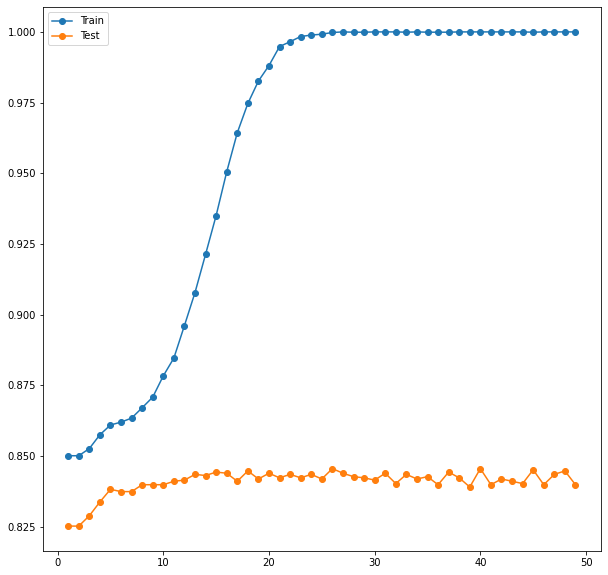

In [89]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [90]:
model.feature_importances_

array([0.06322715, 0.08837239, 0.02812723, 0.03931354, 0.12247997,
       0.07616713, 0.07611665, 0.15428496, 0.00680601, 0.06862235,
       0.03202471, 0.03734161, 0.056276  , 0.0570967 , 0.01918515,
       0.00989493, 0.00081962, 0.0101579 , 0.053686  ])

## Grid Search

In [91]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,15,20],
    'max_features': [5], #For classification a good default is: m = sqrtp
    'n_estimators': [100,300,500], 
    'criterion': ['gini', 'entropy']
}

In [92]:
model_sel = GridSearchCV(model,param_grid)

In [93]:
model_sel.fit(X_train, np.ravel(y_train))

GridSearchCV(estimator=RandomForestClassifier(max_depth=49),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20], 'max_features': [5],
                         'n_estimators': [100, 300, 500]})

In [94]:
model_sel.best_estimator_.score(X_test, y_test)

0.8419341731003657

In [95]:
model_sel.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 5,
 'n_estimators': 300}



### Classification report

In [96]:
y_pred = model_sel.predict(X_test)

In [97]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      2031
         1.0       0.77      0.13      0.23       430

    accuracy                           0.84      2461
   macro avg       0.81      0.56      0.57      2461
weighted avg       0.83      0.84      0.79      2461



In this case, 99% of the non customers are correctly classified and 13% of the customers are correctly classified. 

Also, we find 77% of the class 1 cluster.

Also, we have the dataset is really unbalanced.

## Conclussion

The best performing model is the one using the Balanced data with SMOTETomek + dataset filled with mean and knn with a 0.88 score.